<a href="https://colab.research.google.com/github/farrasdny/AnalisisBigDataUTS/blob/main/Analisis_Big_Data_UTS_PCAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS UTS PCAP DATA** (Classification Using Random Forest)


**Nama**: Farras Danyka Putra **NIM**: 202010370311118

**IMPORT LIBRARY KEBUTUHAN**
1. import pandas as pd: Mengimpor pustaka Pandas yang digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data seperti DataFrame yang memudahkan kerja dengan data tabular.
2. import networkx as nx: Mengimpor pustaka NetworkX yang digunakan untuk analisis jaringan dan graf. NetworkX menyediakan struktur data dan fungsi untuk membangun, mengelola, dan menganalisis graf.
3. import matplotlib.pyplot as plt: Mengimpor pustaka Matplotlib untuk membuat visualisasi seperti plot dan grafik. Matplotlib.pyplot adalah submodul Matplotlib yang sering digunakan untuk membuat visualisasi secara interaktif.
4. import seaborn as sns: Mengimpor pustaka Seaborn yang memperindah tampilan grafik Matplotlib dan menyediakan beberapa fungsionalitas tambahan. Seaborn sering digunakan untuk membuat visualisasi data yang lebih estetis.
5. from sklearn.preprocessing import LabelEncoder: Mengimpor LabelEncoder dari pustaka Scikit-Learn. LabelEncoder digunakan untuk mengonversi label kategori menjadi bentuk numerik, yang diperlukan oleh beberapa model pembelajaran mesin.
6. from sklearn.ensemble import RandomForestClassifier: Mengimpor RandomForestClassifier dari pustaka Scikit-Learn. RandomForestClassifier adalah model klasifikasi yang menggunakan sejumlah pohon keputusan untuk membuat prediksi.
7. from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini digunakan untuk membagi dataset menjadi data latih dan data uji, yang penting dalam proses pelatihan dan evaluasi model.
8. from sklearn.metrics import accuracy_score, classification_report: Mengimpor metrik evaluasi dari pustaka Scikit-Learn. accuracy_score digunakan untuk menghitung akurasi model, dan classification_report menyediakan laporan yang merinci metrik evaluasi seperti presisi, recall, dan f1-score.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Import data dari library google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/dataset'

In [4]:
# Define the train and test data
df = pd.read_csv('/content/drive/MyDrive/dataset/trance_pcap.csv')

In [5]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...
...,...,...,...,...,...,...,...
250683,250684,45.598711,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181073999 Wi...
250684,250685,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250684#1] 443 > 49476 [ACK] Seq...
250685,250686,45.598712,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181075399 Wi...
250686,250687,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250686#1] 443 > 49476 [ACK] Seq...


In [27]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...


In [28]:
df.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
250683,250684,45.598711,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181073999 Wi...
250684,250685,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250684#1] 443 > 49476 [ACK] Seq...
250685,250686,45.598712,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181075399 Wi...
250686,250687,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250686#1] 443 > 49476 [ACK] Seq...
250687,250688,45.598848,10.10.1.198,142.251.10.95,TLSv1.3,64468,"Application Data, Application Data, Applicatio..."


## **PREPROCESSING**

Preprocessing data adalah serangkaian langkah atau proses yang dilakukan pada data mentah sebelum data tersebut digunakan untuk analisis atau pemodelan. Tujuan dari preprocessing data adalah untuk membersihkan, mengorganisir, dan mengubah data mentah menjadi bentuk yang lebih cocok untuk analisis atau penggunaan dalam berbagai aplikasi, termasuk machine learning.

Mengecek missing value dari setiap atribut, terdapat 409 missing value pada atribut Destination, hal tersebut harus dihilangkan karena sangat mempengaruhi hasil dari klasifikasi ini

In [6]:
df.isnull().sum()

No.              0
Time             0
Source           0
Destination    409
Protocol         0
Length           0
Info             0
dtype: int64

In [7]:
df = df.dropna(how='any')

In [8]:
df.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

Mengecek duplikasi

In [9]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
protocol_target = "TCP"

filtered_protocol = df[df['Protocol'] == protocol_target]
filtered_protocol

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...
...,...,...,...,...,...,...,...
250682,250683,45.598711,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250681#2] 443 > 49476 [ACK] Seq...
250683,250684,45.598711,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181073999 Wi...
250684,250685,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250684#1] 443 > 49476 [ACK] Seq...
250685,250686,45.598712,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181075399 Wi...


Dikarenakan ip 10.10.1.198 sangat mendominasi di dataset ini, maka kita akan hanya mengolah ip tersebut dengan menggunakan filtered_data

In [11]:
ip_target = "10.10.1.198"

filtered_data = df[df['Destination'] == ip_target]
filtered_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...
...,...,...,...,...,...,...,...
250682,250683,45.598711,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250681#2] 443 > 49476 [ACK] Seq...
250683,250684,45.598711,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181073999 Wi...
250684,250685,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250684#1] 443 > 49476 [ACK] Seq...
250685,250686,45.598712,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181075399 Wi...


Mengecek tipe data dari tiap atribut

In [12]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241006 entries, 0 to 250686
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          241006 non-null  int64  
 1   Time         241006 non-null  float64
 2   Source       241006 non-null  object 
 3   Destination  241006 non-null  object 
 4   Protocol     241006 non-null  object 
 5   Length       241006 non-null  int64  
 6   Info         241006 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 14.7+ MB


# **PELABELAN TCP DUP ACK**

Situasi "TCP Dup ACK" terjadi ketika penerima menerima paket-paket TCP yang tiba dalam urutan yang salah, atau saat beberapa paket hilang dalam perjalanan.

In [13]:
grouped_data = filtered_data.groupby(filtered_data['Info'].str.contains('TCP Dup ACK', case = False, na = False).cumsum())
# grouped_data = grouped_data.apply(lambda x: 0 if x == 0 else 1)

In [14]:
jumlah_dup = len(grouped_data)
print(f'Jumlah lintas jaringan yang mengalami dup sebanyak: {jumlah_dup}')

Jumlah lintas jaringan yang mengalami dup sebanyak: 172404


In [15]:
grouped_data = filtered_data['Info'].str.contains('TCP Dup ACK', case = False, na = False).astype(int)
filtered_data['Label'] = grouped_data

<ipython-input-15-b03bef53dbeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Label'] = grouped_data


Ngeset label 0 ketika paket berhasil dikirimkan dan sampai ke alamat yang tepat. Sedangkan label 1 ketika paket gagal sampai ke alamat dikarenakan paket hilang di perjalanan

In [16]:
filtered_data

,No.,Time,Source,Destination,Protocol,Length,Info,Label
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...,0
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...,1
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...,1
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...,0
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...,1
...,...,...,...,...,...,...,...,...
250682,250683,45.598711,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250681#2] 443 > 49476 [ACK] Seq...,1
250683,250684,45.598711,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181073999 Wi...,0
250684,250685,45.598712,142.251.10.95,10.10.1.198,TCP,96,[TCP Dup ACK 250684#1] 443 > 49476 [ACK] Seq...,1
250685,250686,45.598712,142.251.10.95,10.10.1.198,TCP,96,443 > 49476 [ACK] Seq=21904 Ack=181075399 Wi...,0


## **VISUALISASI**

label 1 melambangkan bahwa data tersebut merupakan paket jaringan yang hilang dalam perjalanan menuju destinasi IP, dan label 0 melambangkan bahwa data tersebut berhasil sampai ke destinasi IP

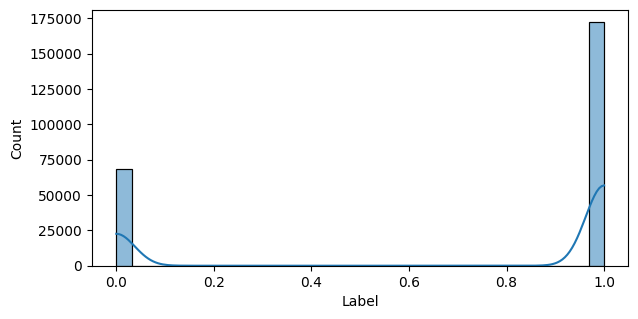

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=filtered_data, x="Label", kde=True)
plt.tight_layout()
plt.show()

Visualisasi pengecekkan protocol terbanyak, TCP sangat mendominasi

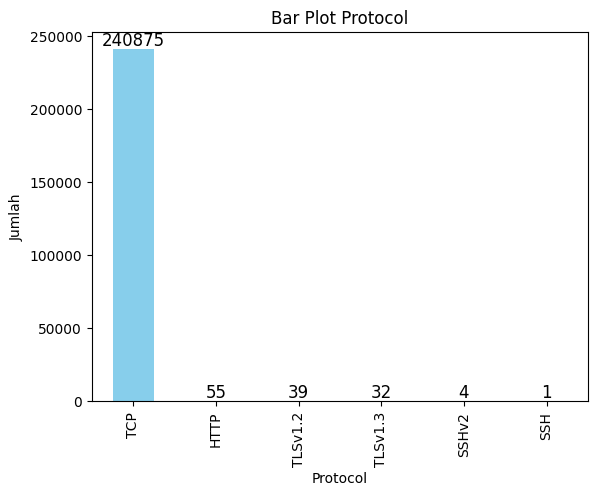

In [18]:
label_counts = filtered_data['Protocol'].value_counts()
label_counts.plot(kind='bar', color='skyblue')

ax = label_counts.plot(kind='bar', color='skyblue')

for i, v in enumerate(label_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Protocol')
plt.ylabel('Jumlah')
plt.title('Bar Plot Protocol')

plt.show()

# **MODELLING**

In [19]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241006 entries, 0 to 250686
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          241006 non-null  int64  
 1   Time         241006 non-null  float64
 2   Source       241006 non-null  object 
 3   Destination  241006 non-null  object 
 4   Protocol     241006 non-null  object 
 5   Length       241006 non-null  int64  
 6   Info         241006 non-null  object 
 7   Label        241006 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 16.5+ MB


Melakukan label encoding yang bertujuan untuk mengubah tipe data object menjadi numerik

In [20]:
labelencoder = LabelEncoder()
filtered_data['Source'] = labelencoder.fit_transform(filtered_data['Source'])
filtered_data['Destination'] = labelencoder.fit_transform(filtered_data['Destination'])
filtered_data['Protocol'] = labelencoder.fit_transform(filtered_data['Protocol'])
filtered_data['Info'] = labelencoder.fit_transform(filtered_data['Info'])

<ipython-input-20-0786b720bc9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Source'] = labelencoder.fit_transform(filtered_data['Source'])
<ipython-input-20-0786b720bc9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Destination'] = labelencoder.fit_transform(filtered_data['Destination'])
<ipython-input-20-0786b720bc9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



1. X = filtered_data.drop("Label", axis=1): Dalam baris ini, filtered_data adalah DataFrame yang berisi data yang sudah difilter atau dimanipulasi sebelumnya. drop digunakan untuk menghapus kolom dari DataFrame. Di sini, kita menghapus kolom dengan nama "Label" menggunakan parameter axis=1 yang menunjukkan bahwa yang dihapus adalah kolom (bukan baris). Hasilnya, X akan berisi DataFrame yang hanya terdiri dari fitur-fitur (kolom-kolom) yang digunakan untuk melatih model. Dengan kata lain, X berisi matriks fitur
2. y = filtered_data["Label"]: Dalam baris ini, kita mengambil kolom "Label" dari DataFrame filtered_data dan menyimpannya dalam variabel y. Variabel y akan berisi label atau target klasifikasi yang ingin diprediksi oleh model. Hasilnya, y akan berisi satu dimensi dari DataFrame yang berisi nilai-nilai label klasifikasi.

Secara keseluruhan, kodingan tersebut memisahkan data menjadi dua bagian: X yang berisi fitur-fitur yang akan digunakan untuk melatih model, dan y yang berisi label atau target klasifikasi yang akan diprediksi oleh model. Ini adalah langkah yang umum dalam pemrosesan data sebelum melatih model pembelajaran mesin.



In [21]:
X = filtered_data.drop("Label", axis=1)  # Asumsi "label" adalah kolom yang berisi label klasifikasi
y = filtered_data["Label"]

Lakukan spliting data agar membagi dataset menjadi dua atau lebih subset yang berbeda. Splitting data umumnya dilakukan dalam konteks pembelajaran mesin untuk melatih dan menguji model.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Memanggil fungsi dari library random forest classifier

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

1. model.predict: Ini adalah metode pada objek model yang digunakan untuk membuat prediksi. Model ini dapat berupa model klasifikasi atau regresi, tergantung pada tipe masalah yang sedang diselesaikan. Dalam kasus kodingan ini, model tersebut kemungkinan besar merupakan model klasifikasi, karena kita memprediksi variabel respons yang bersifat kategorikal.
2. X_test: Ini adalah matriks fitur dari data uji yang ingin kita gunakan untuk membuat prediksi. Data uji ini merupakan bagian dari dataset yang telah dipisahkan sebelumnya menggunakan fungsi splitting data.
3. y_pred: Variabel ini menampung hasil prediksi yang dihasilkan oleh model. Prediksi ini merupakan nilai prediksi untuk setiap contoh dalam data uji. Jika kita berbicara tentang klasifikasi, y_pred akan berisi label kelas yang diprediksi oleh model untuk setiap contoh dalam X_test.

In [24]:
y_pred = model.predict(X_test)

1. accuracy = accuracy_score(y_test, y_pred): Ini menggunakan fungsi accuracy_score dari Scikit-Learn untuk menghitung akurasi model. Akurasi adalah metrik evaluasi yang mengukur sejauh mana model berhasil memprediksi label kelas yang benar pada data uji.
2. classification_report(y_test, y_pred): Ini menggunakan fungsi classification_report dari Scikit-Learn untuk menghasilkan laporan klasifikasi yang merinci beberapa metrik evaluasi, termasuk presisi, recall, f1-score, dan dukungan (support) untuk setiap kelas.

In [25]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

Hasil akurasi didapat sempurna dengan poin 1.00 dikarenakan label sangat berhasil memisahkan paket jaringan mana yang gagal sampai ke alamat tujuan dan sebaliknya

In [26]:
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:")
print(report)

Akurasi: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13669
           1       1.00      1.00      1.00     34533

    accuracy                           1.00     48202
   macro avg       1.00      1.00      1.00     48202
weighted avg       1.00      1.00      1.00     48202

